In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Training_Data_Set.csv')

In [3]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [5]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [6]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [7]:
round( df['Distance '].isnull().sum()/len(df), 5)

0.02263

In [8]:
round( df['engine_power'].isnull().sum()/len(df), 5)

0.02689

In [9]:
round( df['body_type'].isnull().sum()/len(df), 5)

0.92271

* Both 'distance' and 'engine power' has less than 5% of missing values so we drop the missing values.
* 94% of the values are missing in 'body type' so we are not considering it further.

In [10]:
df.dropna(subset = ['Distance '],inplace=True)

In [11]:
df['Distance '].isnull().sum()

0

In [12]:
df.dropna(subset = ['engine_power'],inplace=True)

In [13]:
df['engine_power'].isnull().sum()

0

In [14]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                   0
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power               0
body_type              48430
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [15]:
df1 = df.copy()

In [16]:
df1.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50
5,25006,skoda,octavia,Chennai,12015.0,First,2015,4,1968,110.0,NaN,4,man,4,5,diesel,1543728.75


In [17]:
df1.rename(columns = {'Distance ':'Distance','Owner Type':'Owner_Type','Age of car':'Age_of_car','Vroom Audit Rating':'Vroom_Audit_Rating'}, inplace = True)

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
df1['Maker'] = label_encoder.fit_transform(df['Maker'])

In [20]:
df1['model'] = label_encoder.fit_transform(df['model'])

In [21]:
df1['Location'] = label_encoder.fit_transform(df['Location'])

In [22]:
df1['Owner_Type'] = label_encoder.fit_transform(df1['Owner_Type'])

In [23]:
df1['transmission'] = label_encoder.fit_transform(df['transmission'])

In [24]:
df1['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])

In [25]:
df1.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance', 'Owner_Type',
       'manufacture_year', 'Age_of_car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom_Audit_Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [26]:
df1['seat_count'].unique()

array(['4', '5', 'None', '2', '3', '7', '6', '1', '9', '8'], dtype=object)

In [27]:
df1['seat_count'].replace({'None':0},inplace=True)

In [28]:
df1['seat_count'].unique()

array(['4', '5', 0, '2', '3', '7', '6', '1', '9', '8'], dtype=object)

In [29]:
df1['door_count'].unique()

array(['4', '5', 'None', '2', '3', '1', '6'], dtype=object)

In [30]:
df1['door_count'].replace({'None':0},inplace=True)

In [31]:
df1['door_count'].unique()

array(['4', '5', 0, '2', '3', '1', '6'], dtype=object)

In [32]:
df1['door_count'] = df1['door_count'].astype('int')

In [33]:
df1['seat_count'] = df1['seat_count'].astype('int')

<function matplotlib.pyplot.show(close=None, block=None)>

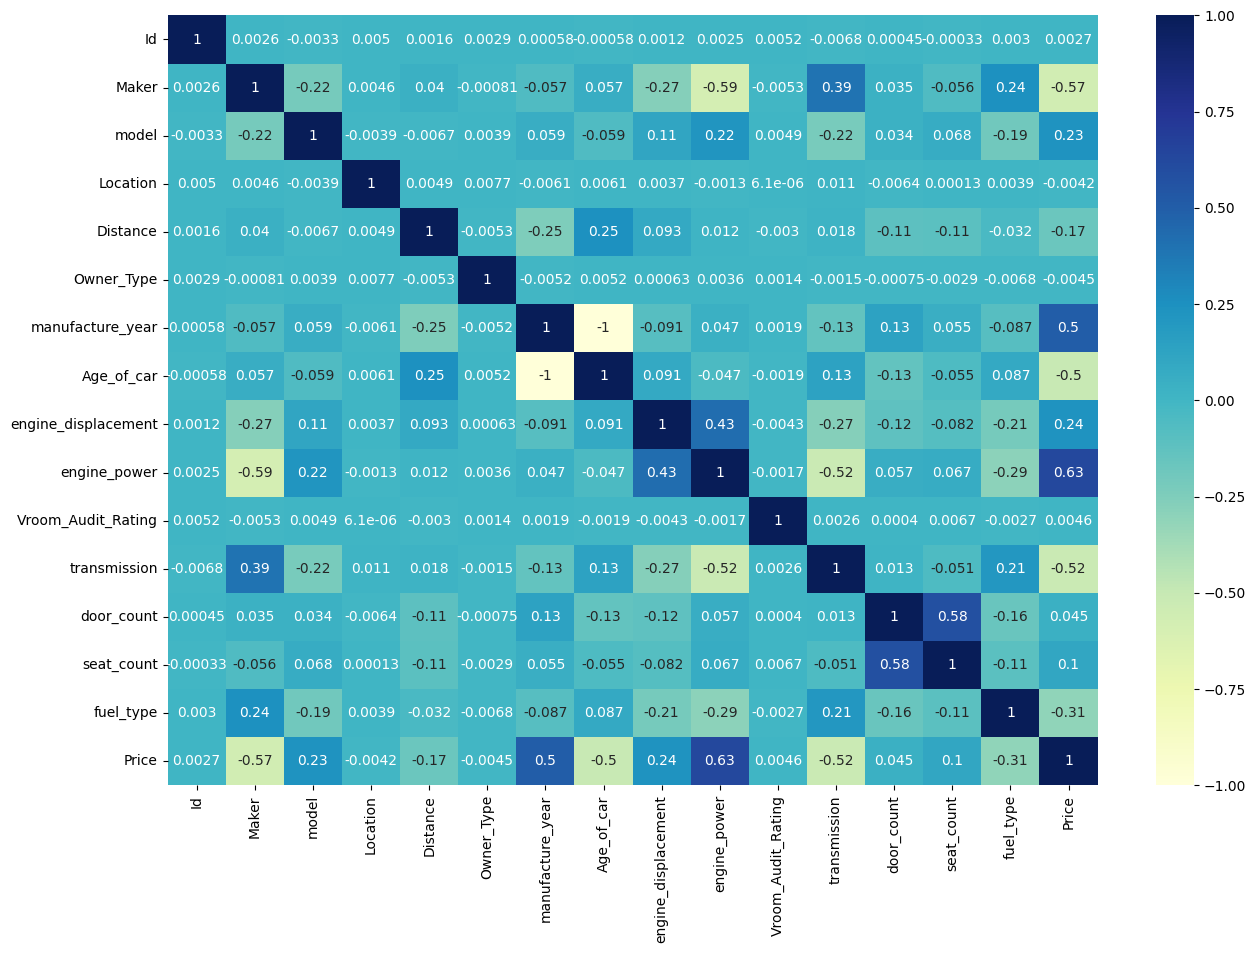

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot =True, cmap='YlGnBu')
plt.show

In [35]:
X = df1[['Id','Maker','model','Location','Distance','Owner_Type','manufacture_year','Age_of_car','engine_displacement','engine_power','Vroom_Audit_Rating','transmission','door_count','seat_count','fuel_type']]
y = df[['Price']]

In [36]:
model = LinearRegression()

In [37]:
model.fit(X,y)

LinearRegression()

In [38]:
y_pre = pd.DataFrame(model.predict(X))

In [39]:
mse = mean_squared_error(y,y_pre)

In [40]:
np.sqrt(mse)

463562.4250181664

In [41]:
test = pd.read_csv('Test_Data_Set.csv')

In [42]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [43]:
test['Maker'] = label_encoder.fit_transform(test['Maker'])
test['model'] = label_encoder.fit_transform(test['model'])
test['Location'] = label_encoder.fit_transform(test['Location'])
test['Owner Type'] = label_encoder.fit_transform(test['Owner Type'])
test['transmission'] = label_encoder.fit_transform(test['transmission'])
test['fuel_type'] = label_encoder.fit_transform(test['fuel_type'])

In [44]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,6,8,9,150000.0,0,2007,12,1595,75.0,NaN,5,1,4,5,1
1,11002,6,14,3,29376.0,3,2014,5,1598,77.0,NaN,4,1,4,5,0
2,11003,6,8,3,30563.0,2,2014,5,1968,110.0,NaN,5,1,5,5,0
3,11004,0,10,4,8650.0,1,2015,4,1968,110.0,NaN,8,0,4,5,0
4,11005,0,17,2,6400.0,3,2015,4,1984,169.0,NaN,4,0,2,None,1


In [45]:
test.rename(columns = {'Distance ':'Distance','Owner Type':'Owner_Type','Age of car':'Age_of_car','Vroom Audit Rating':'Vroom_Audit_Rating'}, inplace = True)

In [46]:
test['door_count'].replace({'None':0},inplace=True)

In [47]:
test['door_count'] = test['door_count'].astype('int')

In [48]:
test['seat_count'].replace({'None':0},inplace=True)

In [49]:
test['seat_count'] = test['seat_count'].astype('int')

In [50]:
X_test = test[['Id','Maker','model','Location','Distance','Owner_Type','manufacture_year','Age_of_car','engine_displacement','engine_power','Vroom_Audit_Rating','transmission','door_count','seat_count','fuel_type']]

In [51]:
X_test.isna().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance               128
Owner_Type               0
manufacture_year         0
Age_of_car               0
engine_displacement      0
engine_power           168
Vroom_Audit_Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
dtype: int64

In [52]:
X_test['Distance'] = X_test['Distance'].fillna(X_test['Distance'].median())

In [53]:
X_test['engine_power'] = X_test['engine_power'].fillna(X_test['engine_power'].median())

In [54]:
X_test.isna().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner_Type             0
manufacture_year       0
Age_of_car             0
engine_displacement    0
engine_power           0
Vroom_Audit_Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [55]:
Id = test['Id']

In [56]:
y_test_pre = pd.DataFrame(model.predict(X_test),index = Id)

In [57]:
y_test_pre.columns = ['Price']

In [58]:
#y_test_pre.to_csv('Anoop_hackathon.csv')

In [59]:
y_test_pre

,Price
Id,
11001,3.437063e+05
11002,1.087846e+06
11003,1.248386e+06
11004,2.137594e+06
11005,2.372644e+06
...,...
16611,9.946402e+05
16612,4.397079e+05
16613,2.461991e+05


In [60]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Price~Id+Maker+model+Location+Distance+Owner_Type+manufacture_year+Age_of_car+engine_displacement+engine_power+Vroom_Audit_Rating+transmission+door_count+seat_count+fuel_type',data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     8600.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        12:14:16   Log-Likelihood:            -7.3947e+05
No. Observations:               51119   AIC:                         1.479e+06
Df Residuals:                   51104   BIC:                         1.479e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -39.7953      0.237   -167.789      0.000     -40.260     -39.330
Id                      0.0858      0.133      0.646      0.518      -0.175       0.346
Maker                -7.81e+04   1006.497    -77.601      0.000   -8.01e+04   -7.61e+04
model                3691.6172    346.210     10.663      0.000    3013.042    4370.192
Location              481.7368    649.786      0.741      0.458    -791.851    1755.324
Distance               -0.2014      0.009    -22.981      0.000      -0.219      -0.184
Owner_Type          -3628.6238   1833.462     -1.979      0.048   -7222.228     -35.019
manufacture_year      844.0141      8.952     94.282      0.000     826.468     861.560
Age_of_car          -8.119e+04    480.180   -169.084      0.000   -8.21e+04   -8.02e+04
engine_displacement     1.3575      2.057      0.660      0.509      -2.674       5.389
engine_power         6853.4258     64.254    106.661      0.000    6727.486    6979.365
Vroom_Audit_Rating   1596.5415   1445.345      1.105      0.269   -1236.350    4429.433
transmission        -2.689e+05   5337.060    -50.381      0.000   -2.79e+05   -2.58e+05
door_count          -4.896e+04   1869.500    -26.190      0.000   -5.26e+04   -4.53e+04
seat_count           3.076e+04   1440.450     21.357      0.000    2.79e+04    3.36e+04
fuel_type           -1.251e+05   4458.487    -28.063      0.000   -1.34e+05   -1.16e+05
==============================================================================
Omnibus:                    54236.749   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27373455.206
Skew:                           4.648   Prob(JB):                         0.00
Kurtosis:                     115.983   Cond. No.                     1.18e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""